In [1]:
import matplotlib.pyplot as plt

In [2]:
!pip install networkx

In [3]:
import networkx as nx
import pandas as pd

df = pd.read_csv('edge_newest.csv')
df = df.rename(columns={x:x.lower() for x in df})

In [4]:
df

,source,target,type,weight,tags
0,0,5,Undirected,1,"['familyxxx', 'milf', 'big ass', 'big tits', '..."
1,0,6,Undirected,1,"['evolvedfights', 'rough', 'kay carter', 'nath..."
2,0,7,Undirected,2,"['bellesafilms', 'small', 'pornohub', 'tits', ..."
3,0,8,Undirected,1,"['bellesafilms', 'big cock', 'big natural boob..."
4,0,31,Undirected,1,"['pervtherapy', 'threesome', 'stepsis', 'steps..."
...,...,...,...,...,...
7605,29,2142,Undirected,1,"['hot crazy mess', 'blonde', 'natural tits', '..."
7606,29,2205,Undirected,2,"['butt', 'big boobs', 'mom', 'mother', 'stepmo..."
7607,29,2214,Undirected,1,"['big boobs', 'latin', 'big cock', 'mom', 'mot..."
7608,29,2250,Undirected,1,"['point of view', 'redhead', 'butt', 'alex ada..."


In [5]:
Graphtype = nx.Graph()
G = nx.from_pandas_edgelist(df, edge_attr='weight', create_using=Graphtype)

In [6]:
nx.number_of_nodes(G)

2335

In [7]:
nx.number_of_edges(G)

7540

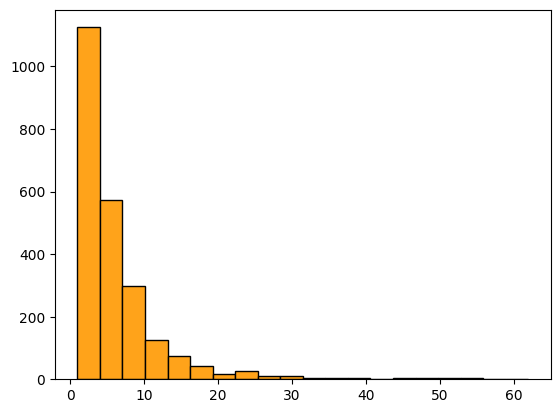

In [8]:
degrees = [G.degree(n) for n in G.nodes()]
plt.hist(degrees,20, color='#ffa31a', edgecolor = "black")
plt.show()

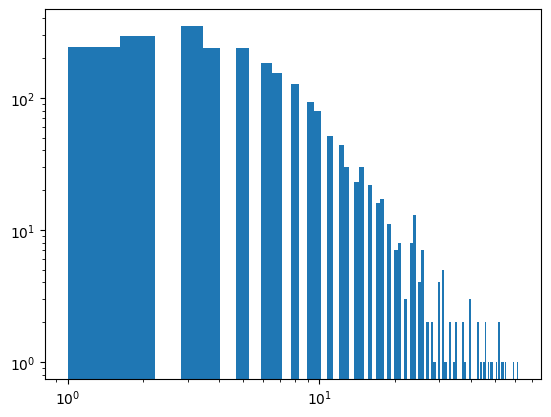

In [9]:
degrees = [G.degree(n) for n in G.nodes()]
plt.hist(degrees, bins=100)
plt.yscale("log")
plt.xscale("log")
plt.show()

In [10]:
sum(degrees)/len(degrees)

6.458244111349036

In [11]:
import numpy as np

In [12]:
def between_index(degree, intervals):
    for x in range(len(intervals)):
        if degree <= intervals[x+1]:
            return x

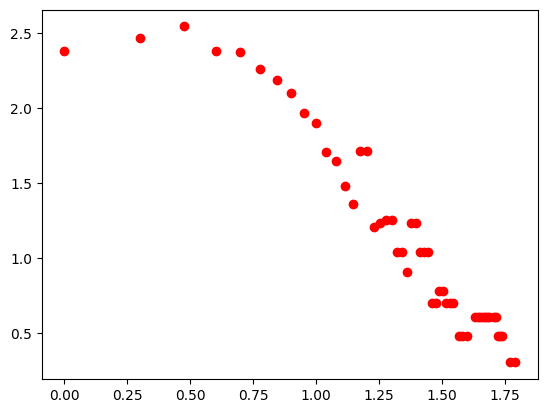

In [13]:
from collections import Counter

degrees = [np.log10(G.degree(n)) for n in G.nodes()]
height, intervals, _ = plt.hist(degrees, len(Counter(degrees)))
plt.clf()

degrees_set = list(set(degrees))

height_per_point = [np.log10(height[between_index(x, intervals)]) for x in degrees_set]

plt.scatter(degrees_set, height_per_point, color='red')

plt.show()

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
degrees_set = np.array(degrees_set).reshape(-1,1)
height_per_point = np.array(height_per_point).reshape(-1,1)

In [16]:
reg = LinearRegression().fit(degrees_set, height_per_point)

In [17]:
reg.score(degrees_set, height_per_point)

0.9070684582608393

In [18]:
c = reg.coef_[0][0]

In [19]:
c

-1.576870737699792

In [20]:
i = reg.intercept_[0]

In [21]:
i

3.226738888223451

In [22]:
regress_line = []
for x in range(0,10):
    if i + c*x < 0:
        break
    regress_line.append(i + c*x)

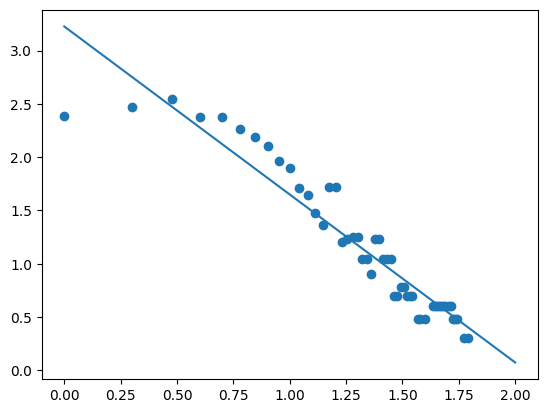

In [23]:
from collections import Counter

plt.scatter(degrees_set, height_per_point, color='#ffa31a')
plt.plot(regress_line, color='#808080')

plt.show()

In [24]:
degrees_h = np.array(degrees_set).flatten()
height_per_point_h = np.array(height_per_point).flatten()

degrees_l = np.array(degrees_set).flatten()
height_per_point_l = np.array(height_per_point).flatten()

In [25]:
s = sorted(set(degrees_h))[3]
print(s)
x = 0
while x < len(degrees_h):
    if degrees_h[x] < s:
        height_per_point_h = np.delete(height_per_point_h,x)
        degrees_h = np.delete(degrees_h,x)
        x -= 1
    x += 1

x = 0    
while x < len(degrees_l):
    if degrees_l[x] >= s:
        height_per_point_l = np.delete(height_per_point_l,x)
        degrees_l = np.delete(degrees_l,x)
        x -= 1
    x += 1

0.6020599913279624


In [26]:
degrees_h = np.array(degrees_h).reshape(-1,1)
height_per_point_h = np.array(height_per_point_h).reshape(-1,1)

degrees_l = np.array(degrees_l).reshape(-1,1)
height_per_point_l = np.array(height_per_point_l).reshape(-1,1)

In [27]:
reg = LinearRegression().fit(degrees_h, height_per_point_h)
reg2 = LinearRegression().fit(degrees_l, height_per_point_l)

In [28]:
reg.score(degrees_h, height_per_point_h)

0.9518195475627736

In [29]:
reg2.score(degrees_l, height_per_point_l)

0.9822678788937624

In [30]:
c = reg.coef_[0][0]

In [31]:
i = reg.intercept_[0]

In [32]:
c2 = reg2.coef_[0][0]

In [33]:
i2 = reg2.intercept_[0]

In [34]:
regress_line_y = [i + c*x for x in degrees_set]
regress_line_x = [x for x in degrees_set]

regress_line_y_2 = [i2 + c2*x for x in degrees_set]
regress_line_x_2 = [x for x in degrees_set]

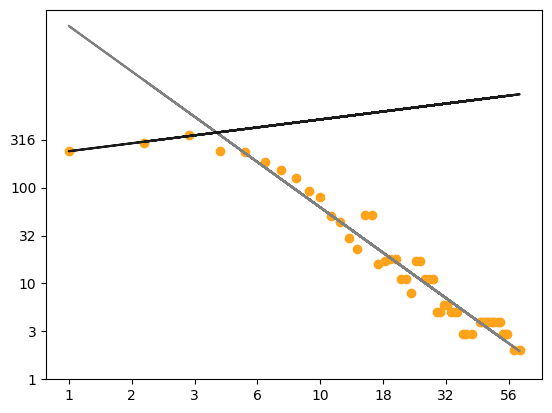

In [35]:
from collections import Counter

plt.scatter(degrees_set, height_per_point, color='#ffa31a')
plt.plot(regress_line_x, regress_line_y, color='#808080')
plt.plot(regress_line_x_2, regress_line_y_2, color='#1b1b1b')

flat = np.arange(0,3.0,0.5)

y = [round(10**x) for x in flat]
plt.yticks(flat, y)

flat = np.arange(0,2.0,0.25)

x = [round(10**x) for x in flat]
plt.xticks(flat, x)

plt.show()

In [36]:
nx.average_clustering(G)

0.3029777660843591

In [37]:
sub_graphs = [G.subgraph(c) for c in nx.connected_components(G)]

In [38]:
for x in sub_graphs:
    print(x.number_of_nodes())

2305
4
2
2
2
5
3
4
2
2
2
2


In [39]:
length = dict(nx.all_pairs_shortest_path_length(G))

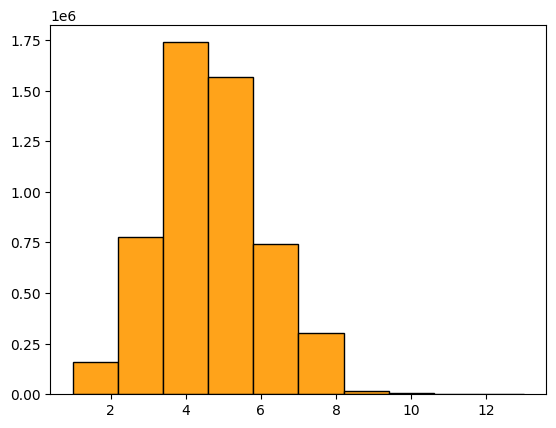

In [40]:
distances = []
for x in length.keys():
    for y in length[x].keys():
        if x == y:
            continue
        distances.append(length[x][y])
plt.hist(distances, bins=10, color='#ffa31a', edgecolor = "black")
plt.show()

In [41]:
sum(distances)/len(distances)

4.570037493522614

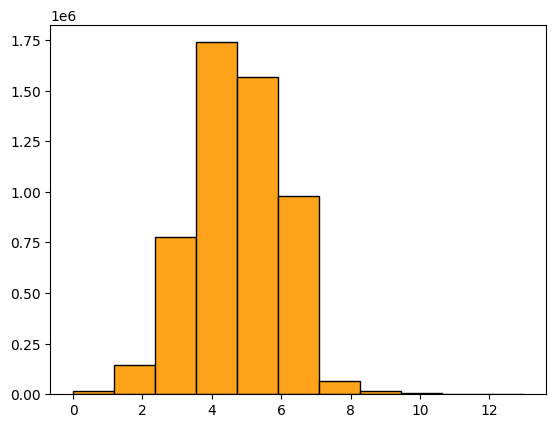

In [42]:
distances = []
for x in length.keys():
    for y in length[x].keys():
        distances.append(length[x][y])
plt.hist(distances, bins=11, color='#ffa31a', edgecolor = "black")
plt.show()

In [43]:
sum(distances)/len(distances)

4.568029061649099

In [44]:
nx.diameter(sub_graphs[0], weight=None)

13

In [45]:
btw = nx.betweenness_centrality(G)

In [46]:
btw = dict(sorted(btw.items(), key=lambda item: item[1], reverse=True))

In [47]:
btw

{374: 0.04908068997711048,
 257: 0.04825615760568999,
 16: 0.036897461498635986,
 187: 0.03671189668621132,
 191: 0.03628431543826935,
 500: 0.030982731977469345,
 15: 0.030451991554995114,
 292: 0.02935991321489681,
 341: 0.027822752450275098,
 286: 0.02767250228989553,
 92: 0.025742971420893837,
 448: 0.02491268353287803,
 156: 0.024248756519599825,
 200: 0.02386774210285572,
 157: 0.02319227833360406,
 267: 0.021228509255458983,
 29: 0.021113624887099513,
 170: 0.020081297641988783,
 261: 0.019636957425049152,
 478: 0.018484247530727863,
 112: 0.018269547634379213,
 81: 0.017880939936058503,
 80: 0.017588711129665067,
 288: 0.016859139818028144,
 886: 0.015868724278628784,
 135: 0.015749338099078136,
 487: 0.01571528285851469,
 666: 0.014724803357474675,
 981: 0.013818707900020497,
 1058: 0.013712645350733169,
 1455: 0.013586735579619362,
 371: 0.013444674067804184,
 122: 0.013124929401705104,
 330: 0.013110844825599382,
 289: 0.01299789871591143,
 423: 0.012817091936096724,
 589: 0

In [48]:
importantes = list(btw.keys())[:50]

In [49]:
df = pd.read_csv('node_new.csv')

In [50]:
imp = df[df.Id.isin(importantes)]

In [51]:
imp

,Id,Label,Background,Tag mais frequente,Ethnicity,Weight,Height,Gender,Start Year,Profile Views,Interesed in,Most used word
3,3,Emily-Willis,None,petite,White,50,165,Female,None,"112,537,506",Guys and Girls,Emily
10,10,Johnny-Love,None,big tits,Latin,None,None,Male,None,"7,088,290",Girls,Johnny
12,12,Rion-King,None,blowjob,White,68,180,Male,2014,"3,879,201",Girls,Step
15,15,Danny-D,None,brazzers,White,68,185,Male,2007,"30,891,299",Girls,Brazzers
16,16,Jordi-El-Nino-Polla,None,brazzers,White,75,173,Male,None,"146,884,790",Girls,Jordi
29,29,Alex-Adams,None,alex adams,White,83,178,Male,None,"236,063,916",Girls,Alex
80,80,Mick-Blue,None,blowjob,White,82,178,Male,2005,"7,397,294",Girls,Her
81,81,Angela-White,Australian,natural tits,White,59,160,Female,2003,"164,084,414",Guys and Girls,Angela
92,92,Codey-Steele,Danish,blowjob,White,79,178,Male,2016,"2,791,556",Girls,Her
95,95,Cherie-DeVille,American,big boobs,White,55,165,Female,2010,"57,073,852",Guys and Girls,Her


<Axes: >

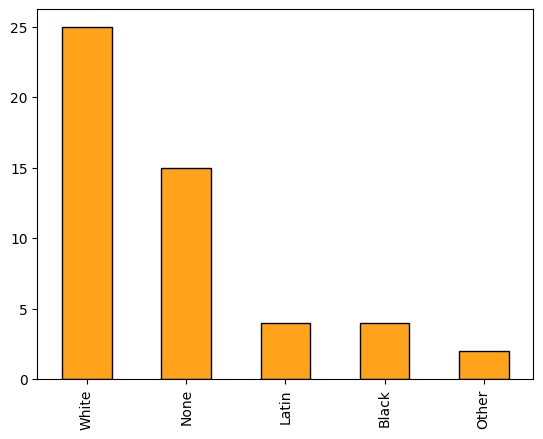

In [52]:
imp['Ethnicity'].value_counts().plot(kind='bar', color='#ffa31a', edgecolor = "black")

<Axes: >

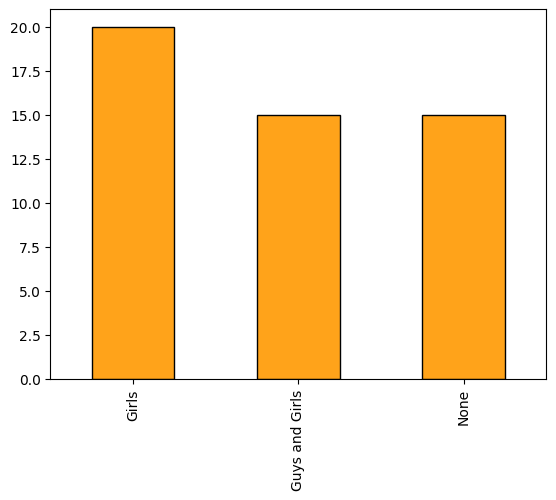

In [53]:
imp['Interesed in'].value_counts().plot(kind='bar', color='#ffa31a', edgecolor = "black")

<Axes: >

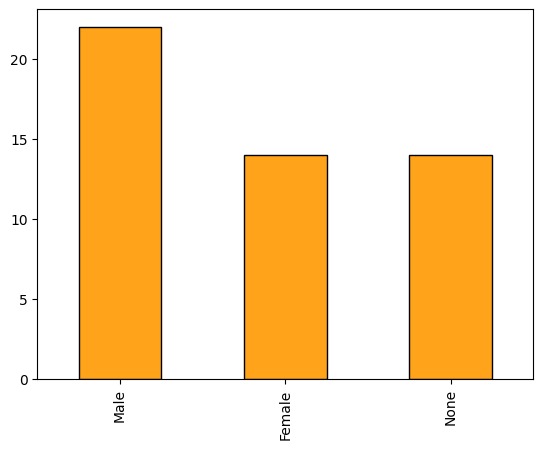

In [54]:
imp['Gender'].value_counts().plot(kind='bar', color='#ffa31a', edgecolor = "black")

<Axes: >

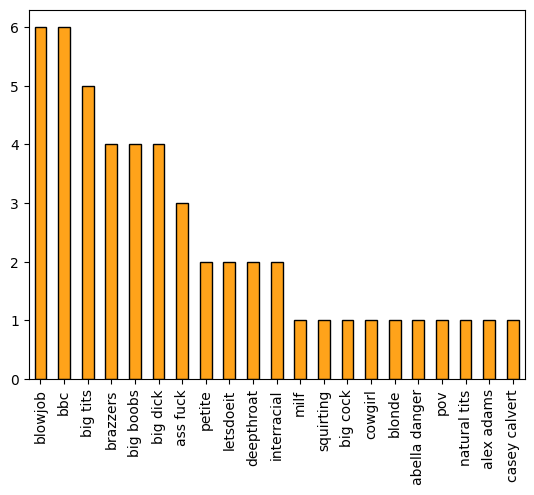

In [55]:
imp['Tag mais frequente'].value_counts().plot(kind='bar', color='#ffa31a', edgecolor = "black")

In [56]:
peso = imp[imp['Weight'] != 'None']

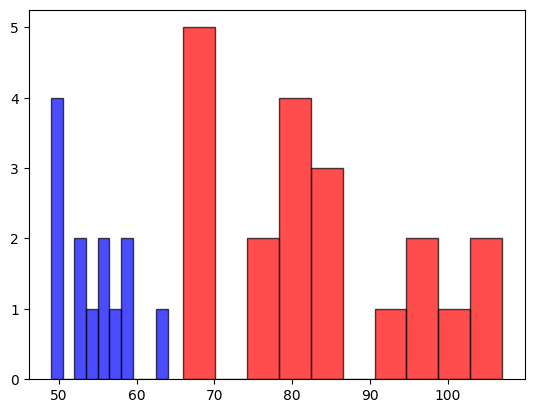

In [57]:
plt.hist(pd.to_numeric(peso[peso['Gender'] == 'Female']['Weight']), alpha=0.7, color='blue', edgecolor = "black")
plt.hist(pd.to_numeric(peso[peso['Gender'] == 'Male']['Weight']), alpha=0.7, color='red', edgecolor = "black")
plt.show()

In [58]:
alt = imp[imp['Height'] != 'None']

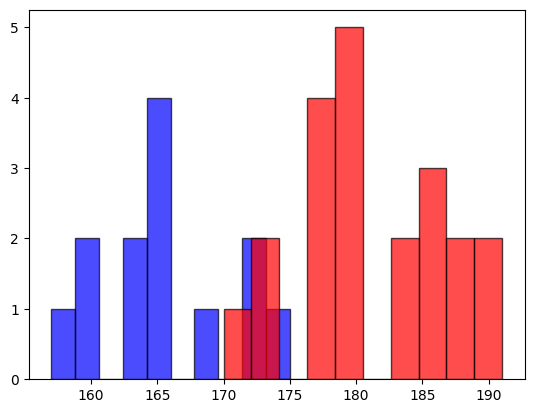

In [59]:
plt.hist(pd.to_numeric(alt[alt['Gender'] == 'Female']['Height']), alpha=0.7, color='blue', edgecolor = "black")
plt.hist(pd.to_numeric(alt[alt['Gender'] == 'Male']['Height']), alpha=0.7, color='red', edgecolor = "black")
plt.show()

In [60]:
peso_alt = imp[(imp['Weight'] != 'None') & (imp['Height'] != 'None')]

In [61]:
peso_alt['IMC'] = pd.to_numeric(peso_alt['Weight'])/((pd.to_numeric(peso_alt['Height'])/100)**2)

C:\Users\eduar\AppData\Local\Temp\ipykernel_592\1838412645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peso_alt['IMC'] = pd.to_numeric(peso_alt['Weight'])/((pd.to_numeric(peso_alt['Height'])/100)**2)


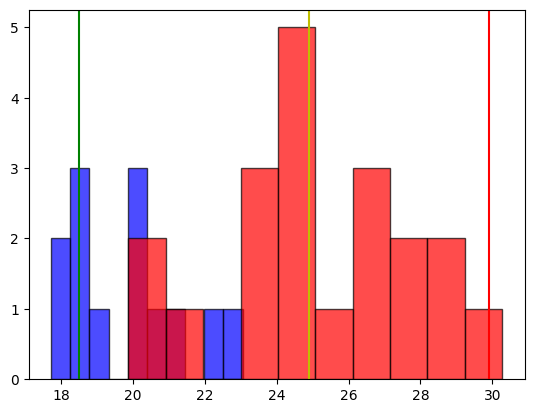

In [62]:
plt.hist(pd.to_numeric(peso_alt[peso_alt['Gender'] == 'Female']['IMC']),alpha=0.7, color='blue', edgecolor = "black")
plt.hist(pd.to_numeric(peso_alt[peso_alt['Gender'] == 'Male']['IMC']), alpha=0.7, color='red', edgecolor = "black")
plt.axvline(18.5, color='g')
plt.axvline(24.9, color='y')
plt.axvline(29.9, color='r')
plt.show()

In [63]:
nx.degree_assortativity_coefficient(G)

0.0169061540554663

In [64]:
nx.degree_pearson_correlation_coefficient(G)

0.01690615405546656